In [1]:
import pandas as pd 

data = pd.read_csv('../Dataset/substance.csv')
data

,substance,year,title,num_ref,num_ref_3years,arxiv,neurips,iclr,icml,aaai,...,atr37,atr38,atr39,citation_count,citedIn2018,citedIn2019,citedIn2020,citedIn2021,citedIn2022,citedIn2023
0,0,2018,A Deep Reinforced Model for Abstractive Summar...,37,18,8,4,3,0,2,...,3,17,113,1195,157.0,223.0,261.0,168.0,139.0,48.0
1,0,2019,Learning Latent Superstructures in Variational...,39,9,2,5,2,7,1,...,3,53,150,36,2.0,4.0,10.0,12.0,9.0,2.0
2,0,2020,Robust Reinforcement Learning for Continuous C...,41,15,7,0,3,3,1,...,1,80,225,72,0.0,3.0,18.0,25.0,27.0,9.0
3,0,2020,Language GANs Falling Short,30,14,13,1,4,0,0,...,5,26,163,153,5.0,32.0,47.0,41.0,32.0,14.0
4,0,2019,Quaternion Recurrent Neural Networks,50,13,6,0,1,2,0,...,1,88,161,74,5.0,13.0,20.0,23.0,17.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,0,2019,Initialized Equilibrium Propagation for Backpr...,23,7,14,0,0,1,0,...,2,52,142,3,0.0,1.0,2.0,0.0,0.0,0.0
2255,1,2019,Selfless Sequential Learning,48,12,12,0,6,1,0,...,1,34,167,86,3.0,17.0,23.0,24.0,22.0,6.0
2256,0,2019,Model-Predictive Policy Learning with Uncertai...,47,13,0,0,2,5,0,...,1,85,200,88,0.0,22.0,25.0,18.0,24.0,8.0
2257,0,2019,CBOW Is Not All You Need: Combining CBOW with ...,32,19,4,7,3,0,0,...,2,41,152,11,0.0,2.0,2.0,6.0,1.0,0.0


In [2]:
label_counts = data.groupby(['title', 'substance']).size().unstack(fill_value=0)
dominant_labels = label_counts.idxmax(axis=1)
data = data.merge(dominant_labels.rename('dominant_label'), left_on='title', right_index=True)
df_filtered = data[data['substance'] == data['dominant_label']]

label_counts_0 = data[data['substance'] == 0].groupby('title').size().rename('count_0')
label_counts_1 = data[data['substance'] == 1].groupby('title').size().rename('count_1')

df_filtered = df_filtered.merge(label_counts_0, left_on='title', right_index=True, how='left')
df_filtered = df_filtered.merge(label_counts_1, left_on='title', right_index=True, how='left')

df_filtered = df_filtered[df_filtered['count_0'] != df_filtered['count_1']]
df_filtered = df_filtered.drop(['dominant_label', 'count_0', 'count_1'], axis=1)

In [3]:
data = df_filtered.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 2257
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   substance       1155 non-null   int64  
 1   year            1155 non-null   int64  
 2   title           1155 non-null   object 
 3   num_ref         1155 non-null   int64  
 4   num_ref_3years  1155 non-null   int64  
 5   arxiv           1155 non-null   int64  
 6   neurips         1155 non-null   int64  
 7   iclr            1155 non-null   int64  
 8   icml            1155 non-null   int64  
 9   aaai            1155 non-null   int64  
 10  iccv            1155 non-null   int64  
 11  cvpr            1155 non-null   int64  
 12  emnlp           1155 non-null   int64  
 13  acl             1155 non-null   int64  
 14  naacl           1155 non-null   int64  
 15  eccv            1155 non-null   int64  
 16  icra            1155 non-null   int64  
 17  icassp          1155 non-null   i

<Axes: xlabel='substance', ylabel='count'>

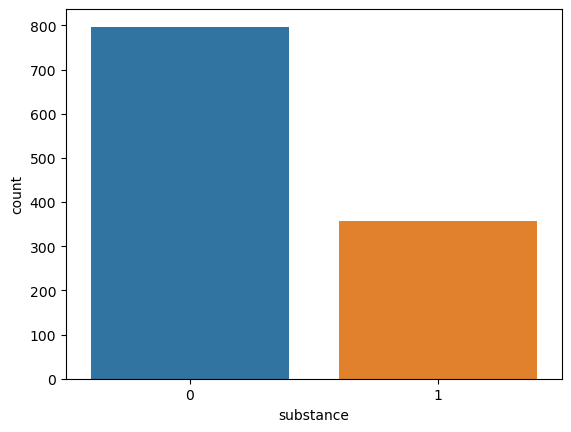

In [4]:
import seaborn as sns

sns.countplot(x=data['substance'])

In [5]:
import plotly.graph_objects as go
import numpy as np

def correlation_matrix(dataframe):
    df_corr = dataframe.corr()
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            x = df_corr.columns,
            y = df_corr.index,
            z = np.array(df_corr),
            text=df_corr.values,
            texttemplate='%{text:.2f}'
        )
    )
    fig.show()

## Citing Sentence Predictor

In [6]:
citing_sentence = data[['atr0', 'atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9', 'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17', 'atr18', 'atr19']]
y = data['substance']

In [7]:
dataframe = citing_sentence.join([y])
correlation_matrix(dataframe)

In [8]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

def find_chi(features, y, k):
    chi_square = SelectKBest(score_func=chi2, k=k)
    fit = chi_square.fit(features, y)
    
    selected_feature_indices = chi_square.get_support(indices=True)
    feature_names = features.columns
    chi2_scores = fit.scores_
    feature_score_dict = dict(zip(feature_names, chi2_scores))
    sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)
    selected_feature_names = [feature[0] for feature in sorted_features[:k]]
    
    print("Selected Feature Names:", selected_feature_names)
    x_chi = chi_square.fit_transform(features, y)
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x_chi)
    
    x_res, y_res = oversampling(x, y)
    x_train, x_test, y_train, y_test = train_split(x_res, y_res)
    return x_train, x_test, y_train, y_test, selected_feature_names

In [9]:
from imblearn.over_sampling import SMOTE

def oversampling(x, y):
    sm = SMOTE(random_state=123)
    x_res, y_res = sm.fit_resample(x, y)
    return x_res, y_res

In [10]:
from sklearn.model_selection import train_test_split

def train_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [11]:
test = pd.DataFrame(columns=['Features', 'Accuracy'])

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def model(features, y, i):
    model = XGBClassifier()
    x_train, x_test, y_train, y_test, selected_feature_names = find_chi(features, y, i)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    new_data = pd.DataFrame({'Features': [selected_feature_names], 'Accuracy': ["%.2f%%" % (accuracy * 100.0)]})
    global test
    test = pd.concat([test, new_data], ignore_index=True)
    return accuracy

In [13]:
for i in dict(enumerate(citing_sentence)):
    accuracy = model(citing_sentence, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr19']
Accuracy: 58.93%
Selected Feature Names: ['atr19', 'atr6']
Accuracy: 64.89%
Selected Feature Names: ['atr19', 'atr6', 'atr7']
Accuracy: 72.10%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18']
Accuracy: 74.29%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2']
Accuracy: 72.73%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9']
Accuracy: 75.86%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9', 'atr5']
Accuracy: 73.35%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9', 'atr5', 'atr11']
Accuracy: 74.92%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9', 'atr5', 'atr11', 'atr12']
Accuracy: 74.92%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9', 'atr5', 'atr11', 'atr12', 'atr10']
Accuracy: 76.80%
Selected Feature Names: ['atr19', 'atr6', 'atr7', 'atr18', 'atr2', 'atr9', 'atr5', 'atr11', 'atr12', 'atr10', 'atr16'

## Regular Sentences Predictor

In [14]:
regular_sentences = data[['atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25', 'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33', 'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39']]

In [15]:
dataframe = regular_sentences.join([y])
correlation_matrix(dataframe)

In [16]:
for i in dict(enumerate(regular_sentences)):
    accuracy = model(regular_sentences, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr29']
Accuracy: 55.80%
Selected Feature Names: ['atr29', 'atr32']
Accuracy: 65.20%
Selected Feature Names: ['atr29', 'atr32', 'atr22']
Accuracy: 70.85%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27']
Accuracy: 71.79%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39']
Accuracy: 74.29%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35']
Accuracy: 73.35%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35', 'atr26']
Accuracy: 73.04%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35', 'atr26', 'atr38']
Accuracy: 76.80%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35', 'atr26', 'atr38', 'atr31']
Accuracy: 76.49%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35', 'atr26', 'atr38', 'atr31', 'atr34']
Accuracy: 75.55%
Selected Feature Names: ['atr29', 'atr32', 'atr22', 'atr27', 'atr39', 'atr35', 'atr26

## Reference-Based Predictor

In [17]:
reference_based = data[['num_ref', 'num_ref_3years', 'arxiv', 'neurips', 'iclr', 'icml', 'aaai', 'iccv', 'cvpr', 'emnlp', 'acl', 'naacl', 'eccv', 'icra', 'icassp', 'ijcai', 'aistats', 'sigkdd', 'neuralcom', 'ieee_tran', 'acm_tran', 'mit_press', 'nature', 'jmlr']]

In [18]:
dataframe = reference_based.join([y])
correlation_matrix(dataframe)

In [19]:
for i in dict(enumerate(reference_based)):
    accuracy = model(reference_based, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['num_ref_3years']
Accuracy: 60.82%
Selected Feature Names: ['num_ref_3years', 'num_ref']
Accuracy: 66.46%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips']
Accuracy: 72.10%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr']
Accuracy: 71.16%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv']
Accuracy: 71.47%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv', 'eccv']
Accuracy: 71.47%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv', 'eccv', 'emnlp']
Accuracy: 72.41%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv', 'eccv', 'emnlp', 'acl']
Accuracy: 72.10%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv', 'eccv', 'emnlp', 'acl', 'icassp']
Accuracy: 71.16%
Selected Feature Names: ['num_ref_3years', 'num_ref', 'neurips', 'cvpr', 'arxiv', 'eccv', 'emnlp', 'acl', 'icassp', 'ac

## Combination Predictor

In [20]:
combination = citing_sentence.join([regular_sentences, reference_based])

In [21]:
for i in dict(enumerate(combination)):
    accuracy = model(combination, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['num_ref_3years']
Accuracy: 60.82%
Selected Feature Names: ['num_ref_3years', 'atr19']
Accuracy: 66.14%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref']
Accuracy: 71.16%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips']
Accuracy: 68.97%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr']
Accuracy: 70.85%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr', 'atr29']
Accuracy: 76.49%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr', 'atr29', 'atr6']
Accuracy: 72.41%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr', 'atr29', 'atr6', 'atr32']
Accuracy: 71.16%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr', 'atr29', 'atr6', 'atr32', 'atr7']
Accuracy: 75.86%
Selected Feature Names: ['num_ref_3years', 'atr19', 'num_ref', 'neurips', 'cvpr', 'atr29', 'atr6', 'atr32', 'atr7', 'at

In [22]:
test.to_excel('substance.xlsx', index=False)